In [ ]:
# overall goal: 
# understanding why and when employees are most likely to leave 

# specific goal: 
# predict when employees are going to quit 
# understand the main drivers of employee churn




In [144]:
import pandas as pd

df = pd.read_csv('employee_retention_data.csv')
print(df.shape)
df.head(5)

(24702, 7)


,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [145]:
#missing values
df.isnull().sum().sort_values(ascending = False)
#if NA = still working and has not quit

quit_date      11192
join_date          0
salary             0
seniority          0
dept               0
company_id         0
employee_id        0
dtype: int64

In [146]:
#drop duplicates
df = df.drop_duplicates(subset=['employee_id'], keep=False)
df.shape #none

(24702, 7)

In [147]:
#change NAs on quit_date with 0
df = df.fillna(0)
df.head(5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [148]:
#Create Quit Column 
df['quit'] = df['quit_date'] == 0

In [149]:
df.head(5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,False
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,False
2,927315.0,4,marketing,14,101000.0,2014-10-13,0,True
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,False
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,False


In [150]:
#make into 0 or 1
#0 = quit
#1 = no quit
df['quit'] *= 1

In [151]:
df.head(5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,0
2,927315.0,4,marketing,14,101000.0,2014-10-13,0,1
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0


In [152]:
#swap to make 0 = no quit, 1 = quit
df = df.replace({0:1, 1:0})

In [153]:
df.head(5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,1,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1


In [154]:
#convert dept into factor
#turn into categorical
df['dept'] = df['dept'].astype('category')

#select categorical
cat_columns = df.select_dtypes(['category']).columns

#make factor
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

print(df.shape)
df.head(3)

(24702, 8)


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,0,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,4,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,4,14,101000.0,2014-10-13,1,0


In [155]:
#split join_date
#split date_activ
df['join_date_year'], df['join_date_month_day'] = df['join_date'].str.split('-', 1).str

In [156]:
df.head(5) 

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit,join_date_year,join_date_month_day
0,13021.0,7,0,28,89000.0,2014-03-24,2015-10-30,1,2014,03-24
1,825355.0,7,4,20,183000.0,2013-04-29,2014-04-04,1,2013,04-29
2,927315.0,4,4,14,101000.0,2014-10-13,1,0,2014,10-13
3,662910.0,7,0,20,115000.0,2012-05-14,2013-06-07,1,2012,05-14
4,256971.0,2,1,23,276000.0,2011-10-17,2014-08-22,1,2011,10-17


# Descriptive Stats

In [157]:
############################################################## 
#heat map to check for correlation
############################################################## 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

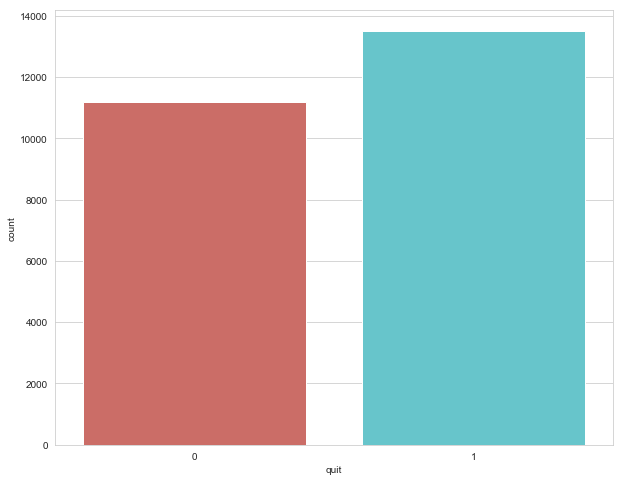

In [158]:
############################################################## 
#plot churn
############################################################## 

%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

#check target variable binary
sb.countplot(x='quit',data=df, palette='hls')

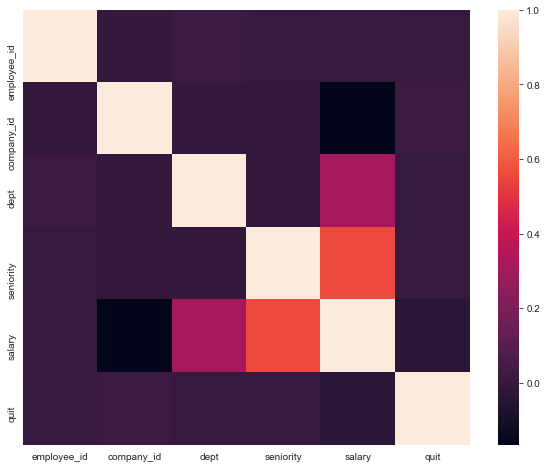

In [159]:
############################################################## 
#check for correlation and dependence
############################################################## 

sb.heatmap(df.corr()) 
#pd.plotting.scatter_matrix(df_clean_train, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In [160]:
#further clean
df_clean = df.drop(['employee_id', 'quit_date', 'join_date_month_day', 'join_date'], axis=1)
#take out id column (string throws errow)
df_clean.head(3)
 

,company_id,dept,seniority,salary,quit,join_date_year
0,7,0,28,89000.0,1,2014
1,7,4,20,183000.0,1,2013
2,4,4,14,101000.0,0,2014


In [161]:
#further clean
df_clean_ = df.drop(['employee_id', 'quit_date', 'join_date_month_day', 'join_date','quit'], axis=1)
#take out id column (string throws errow)
df_clean_.head(3)

,company_id,dept,seniority,salary,join_date_year
0,7,0,28,89000.0,2014
1,7,4,20,183000.0,2013
2,4,4,14,101000.0,2014


# Classifier Testing

In [162]:
# Separate input features (X) and target variable (y)
y = df_clean.quit
X = df_clean_

In [163]:
X.head(5)

,company_id,dept,seniority,salary,join_date_year
0,7,0,28,89000.0,2014
1,7,4,20,183000.0,2013
2,4,4,14,101000.0,2014
3,7,0,20,115000.0,2012
4,2,1,23,276000.0,2011


In [164]:
y.head(5)

0    1
1    1
2    0
3    1
4    1
Name: quit, dtype: int64

[0.76284905 0.74504249 0.75263158 0.74777328 0.73967611 0.74453441
 0.75951417 0.7388664  0.73765182 0.7534413 ]
[0.7704918  0.75958702 0.76008493 0.75862069 0.75412186 0.7527933
 0.76180102 0.7673913  0.7625     0.75888502]
[0.78904515 0.77572169 0.78164323 0.784604   0.77868246 0.78608438
 0.78238342 0.78978534 0.78164323 0.80162842]
Accuracy: 0.75 (+/- 0.02)
Precision: 0.76 (+/- 0.01)
Recall: 0.79 (+/- 0.01)
[[0.85714286 0.14285714]
 [0.71428571 0.28571429]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.85714286 0.14285714]
 [1.         0.        ]
 [0.         1.        ]
 [0.57142857 0.42857143]]
24702
[0 0 1 1 1 1 0 0 1 0]
{0: 10968, 1: 13734}
10-fold cross validation average accuracy: 0.749
[0 1]


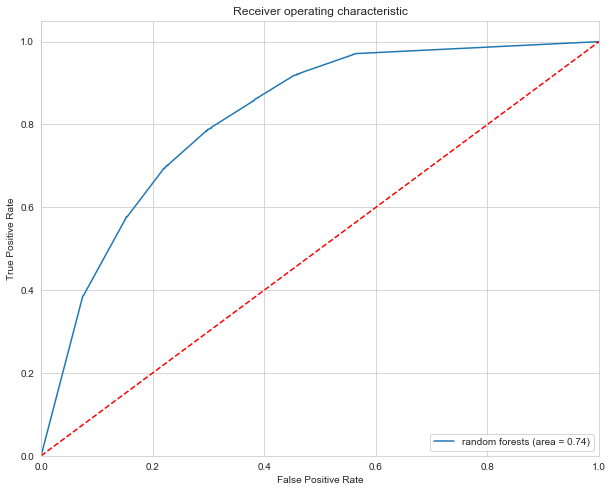

In [165]:
df = df_clean_

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

#Train model
rf1 = RandomForestClassifier(n_estimators=7,).fit(X_train, y_train)

#10 fold
accuracy_scores = cross_val_score(rf1, X, y, cv=10, scoring='accuracy') 
precision_scores = cross_val_score(rf1, X, y, cv=10, scoring='precision') 
recall_scores = cross_val_score(rf1, X, y, cv=10, scoring='recall') 
 
#all scores
print(accuracy_scores)
print(precision_scores)
print(recall_scores)

#average and standard deviation
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(accuracy_scores), np.std(accuracy_scores) * 2))
print("Precision: %0.2f (+/- %0.2f)" % (np.mean(precision_scores), np.std(precision_scores) * 2))
print("Recall: %0.2f (+/- %0.2f)" % (np.mean(recall_scores), np.std(recall_scores) * 2))

# Predict on training set
#get probability
prob_pred = rf1.predict_proba(df)  
print(prob_pred[:10]) #predicted probin [0, 1]
print(len(prob_pred))

#labels
label_pred = rf1.predict(df)
print(label_pred[:10]) #predicted prob in [0, 1]

#count 0 and 1
unique, counts = np.unique(label_pred, return_counts=True)
print(dict(zip(unique, counts)))

#accuracy
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = rf1
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

#look at which class are being counted
print( np.unique(label_pred))

#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='random forests (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rf1_ROC')
plt.show()

In [166]:
################################################
#feature importance
################################################
feature_importances = pd.DataFrame(rf1.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)  

df_top10 = feature_importances.head(10)
df_top10

,importance
join_date_year,0.453621
salary,0.290948
seniority,0.139998
company_id,0.084265
dept,0.031168


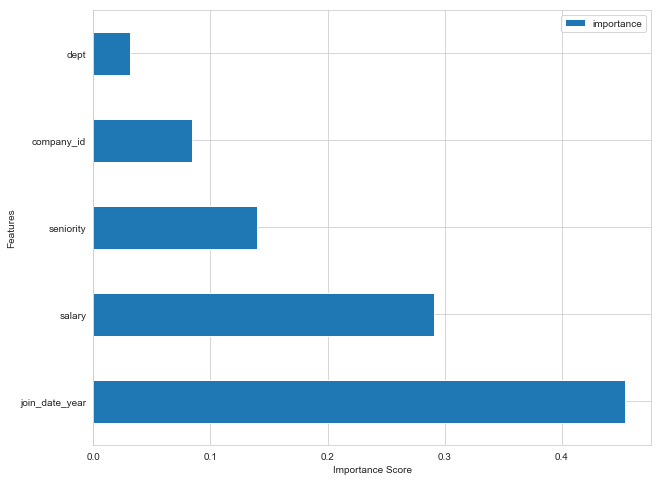

In [167]:
df_top10.plot.barh()
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [168]:
#make dataframe with pow_max and different consumptions
#df_cor = df_clean_train[['pow_max','cons_12m','cons_gas_12m','cons_last_month','forecast_cons_12m',
#                         'forecast_cons_year', 'imp_cons']]
df_cor = df_clean_[['join_date_year', 'salary', 'seniority', 'company_id', 'dept']]
#corr
corr = df_cor.corr()
corr.style.background_gradient().set_precision(2)

,salary,seniority,company_id,dept
salary,1,0.56,-0.17,0.31
seniority,0.56,1,-0.0091,-0.008
company_id,-0.17,-0.0091,1,-0.0042
dept,0.31,-0.008,-0.0042,1


In [169]:
#logistic regression
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/Users/edwinreyes/miniconda3/envs/insightproject/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [170]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [171]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  10, 3318],
       [   8, 4075]])

In [172]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

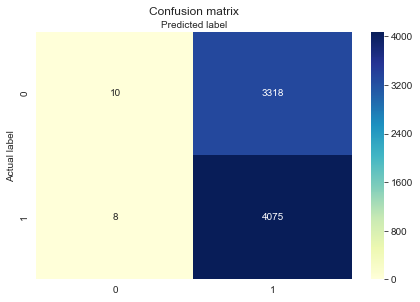

In [173]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#TN, FP
#FN, TP

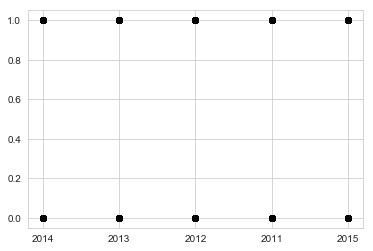

In [181]:
#plot year vs churn
#import plotly.plotly as py
#x= df_clean['join_date_year'] 
#y = y

#plt.plot(x, y, 'o', color='black');